# Precision :-
**Macro Precision :-** In this kind of Precision we take the average value of all the precision of each class.

Macro Precision = (P1 + P2 + P3 + .... + Pn)/n

---------------------------------------------------------------
**Weighted Precision :-** In this Precision we multiply the weight of each class with the each class Precision value.

Weighted Precision = (Class_1_weight/Total_class_weight * Class_1_Precision) + (Class_2_weight/Total_class_weight * Class_2_Precision) + .... + (Class_n_weight/Total_class_weight * Class_n_Precision)


-----------------------------------------------------------------
**Note:-** If our class has balanced weight we will use Macro Precision otherwise we will use Weighted Precision.

# Recall :-
**Macro Recall :-** In this kind of Recall we take the average value of all the Recall of each class.

Macro Recall = (R1 + R2 + R3 + .... + Rn)/n

**Weighted Recall :-** In this Recall we multiply the weight of each class with the each class Recall value.

Weighted Recall = (Class_1_weight/Total_class_weight * Class_1_Recall) + (Class_2_weight/Total_class_weight * Class_2_Recall) + .... + (Class_n_weight/Total_class_weight * Class_n_Recall)

**Note:-** If our class has balanced weight we will use Macro Recall otherwise we will use Weighted Recall.

# F1 Score :-
**Macro F1_Score :-** In this kind of F1_Score we take the average value of all the F1_Score of each class.

Macro F1_Score = (F1_Score_1 + F1_Score_2 + F1_Score_3 + .... + F1_Score_n)/n

**Weighted F1_Score :-** In this F1_Score we multiply the weight of each class with the each class F1_Score value.

Weighted F1_Score = (Class_1_weight/Total_class_weight * Class_1_F1_Score) + (Class_2_weight/Total_class_weight * Class_2_F1_Score) + .... + (Class_n_weight/Total_class_weight * Class_n_F1_Score)

**Note:-** If our class has balanced weight we will use Macro F1_Score otherwise we will use Weighted F1_Score.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [25]:
df_train = pd.read_csv("/content/sample_data/mnist_train_small.csv",header=None)
df_test = pd.read_csv("/content/sample_data/mnist_train_small.csv",header=None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score

In [30]:
X_train = df_train.drop(0,axis=1)
y_train = df_train[0]
X_test = df_test.drop(0,axis=1)
y_test = df_test[0]


In [33]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print(f'''
Accuracy Score : {accuracy_score(y_test,y_pred_lr)},
Precision : {precision_score(y_test,y_pred_lr,average="macro")},
Recall : {recall_score(y_test,y_pred_lr,average="macro")},
F1 Score : {f1_score(y_test,y_pred_lr,average="macro")}''')


Accuracy Score : 0.9486,
Precision : 0.9478111972433828,
Recall : 0.9476555748235731,
F1 Score : 0.9477131417808901


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)


In [35]:
print(f'''
Accuracy Score : {accuracy_score(y_test,y_pred_dt)},
Precision : {precision_score(y_test,y_pred_dt,average="macro")},
Recall : {recall_score(y_test,y_pred_dt,average="macro")},
F1 Score : {f1_score(y_test,y_pred_dt,average="macro")}''')


Accuracy Score : 1.0,
Precision : 1.0,
Recall : 1.0,
F1 Score : 1.0


<Axes: >

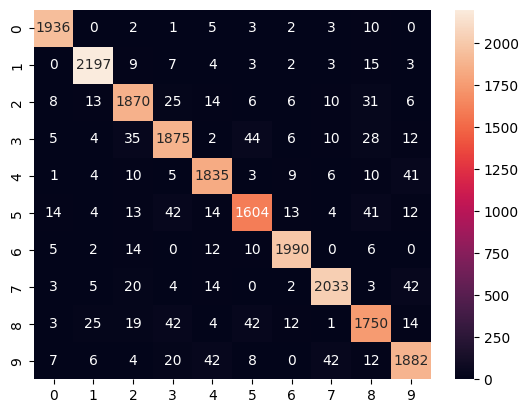

In [36]:
import seaborn as sns
cm = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm,annot=True,fmt="d")

<Axes: >

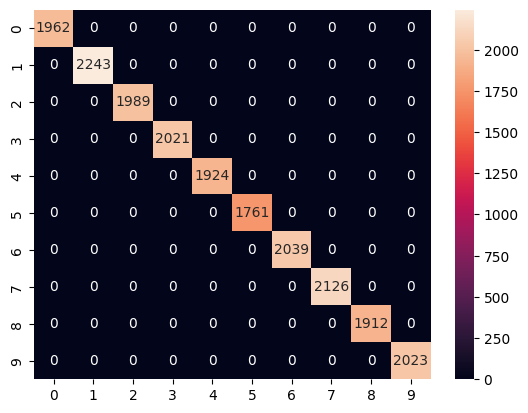

In [37]:
cm = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm,annot=True,fmt="d")

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1962
           1       0.97      0.98      0.98      2243
           2       0.94      0.94      0.94      1989
           3       0.93      0.93      0.93      2021
           4       0.94      0.95      0.95      1924
           5       0.93      0.91      0.92      1761
           6       0.97      0.98      0.98      2039
           7       0.96      0.96      0.96      2126
           8       0.92      0.92      0.92      1912
           9       0.94      0.93      0.93      2023

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [39]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1962
           1       1.00      1.00      1.00      2243
           2       1.00      1.00      1.00      1989
           3       1.00      1.00      1.00      2021
           4       1.00      1.00      1.00      1924
           5       1.00      1.00      1.00      1761
           6       1.00      1.00      1.00      2039
           7       1.00      1.00      1.00      2126
           8       1.00      1.00      1.00      1912
           9       1.00      1.00      1.00      2023

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [63]:
new_data = np.array([np.random.randint(0,2) for x in range(784)]).reshape(1,784)
lr.predict(new_data)

array([5])

In [64]:
dt.predict(new_data)

array([5])